## HW6 - Group 1 Cohort 7

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")


Problem 1: A simulated economy
In this problem you will simulate an economy that incorporates many of the things we
have discussed over the last couple of weeks. The intention is that playing around with this
will help you understand both the math and econometrics as well as the economic lessons
we can draw.
In this economy, agents have risk aversion parameter t which evolves according to an
AR(1) process:
$$\gamma_t = \widetilde{\gamma} + \phi(\gamma_{t-1} - \widetilde{\gamma}) + \varepsilon_{\gamma, t}$$
where $\varepsilon_{\gamma, t}$ i:i:d: $\sim N(0, \sigma_{\gamma}^{2})$. That is, risk aversion is moving over time in a persistent manner and can be at times very high (bad times, recessions, disasters) or very low (good times, booms, bubbles). The market is real log dividend growth is assumed to be i.i.d.:
$$\Delta d_{t} = \mu + \varepsilon_{d, t}$$
$\varepsilon_{d, t} \sim N(0, \sigma_{d}^{2})$ and $Corr(\varepsilon_{d, t}, \varepsilon_{\gamma, t}) = 0$
The conditional expected log excess market returns is given by
$$E_{t}(r_{t+1} - r_{f}) = \gamma_t\sigma_{d}^{2}$$
where $r$ is the log stock market return and $r_f$ is the risk-free rate. Thus, the risk premium is higher when risk aversion is higher. Assume the log real risk-free rate is constant and equal to $r_f = 1%$:w
From the class notes, we have that:
$$pd_t = constant + \sum_{j=1}^{\infty}\rho^{j-1}E_t(\delta_{t+j}) - \rho^{j-1}E_t(r_{t+j})$$
1. Given the process assumed for dividend growth and risk aversion, as well as the specification of the risk premium and the risk-free rate, derive the following expression for
the log price-dividend ratio:
$$pd_t = constant + CF_t - DR_t$$
$$CF_t = \frac{\mu}{1-\rho}$$
$$DR_t = \frac{r_f+\widetilde{\gamma}\sigma_{d}^{2}}{1-\rho}+\frac{\sigma_{d}^{2}}{1-\rho\phi}(\gamma - \widetilde{\gamma})$$

#### Answer

Given the assumed process for log dividend growth (i.i.d gaussian shocks around mean $\mu$), we get that $E_t(\delta_{t+j}) = \mu, \forall j \in \mathbb{R}$.
Thus,  $\sum_{j=1}^{\infty}\rho^{j-1}E_t(\delta_{t+j}) = \mu \cdot \sum_{j=0}^{\infty}\rho^{j} = \frac{\mu}{1-\rho}$ <br>
As it pertains to the $r_{t+j}$ part, its conditional variance depends on a AR(1) process gamma and its position relative to its unconditional mean at time t. We know that the formula for this conditional expectation satisfies $E_t (r_{t+1}) = r_f + \gamma_t \sigma^2_d$ and $E_t (\gamma_{t+j}-\widetilde{\gamma}) = \phi^j(\gamma_t-\widetilde{\gamma})$.

Then use the law of expectation, $E_t(r_{t+j}) = E_t(E_{t+j-1}(r_{r+j})) = E_t(r_f + \gamma_{t+j-1} \sigma^2_d) = r_f + \sigma^2_d [\widetilde{\gamma}+\phi^{j-1}(\gamma_t-\widetilde{\gamma})]$

Thus summing over all indices we get $\Sigma_{j=1}^{\infty} \rho^{j-1} E[r_{t+j}] = \Sigma_{j=1}^{\infty} \rho^{j}(r_f + \sigma_d^2 \widetilde{\gamma}) + (\phi\rho)^{j}\sigma^2_d(\gamma_{t} - \widetilde{\gamma}) =  \frac{r_f+\widetilde{\gamma}\sigma_{d}^{2}}{1-\rho}+\frac{\sigma_{d}^{2}}{1-\rho\phi}(\gamma - \widetilde{\gamma})$ as required.


2. We can decompose the variance of the pd ratio as follows:
$$100 = \frac{Var(CF_t)}{Var(pd_t)} + \frac{Var(DR_t)}{Var(pd_t)} - 2\frac{Cov(CF_t, DR_t)}{Var(pd_r)}$$
How much of the variance is due to the stock market expected return (the discount
rate) moving around? I.e., what is $\frac{Var(DR_t)}{Var(pd_t)}$?

#### Answer
From the question 1 we can find that $CF_t = \frac{\mu}{1-\rho} $ is constant, so $Var(DR_t) = Var(pd_t)$, then $\frac{Var(DR_t)}{Var(pd_t)} = 1$

3. From class, log market returns can be written:
$$r_{t+1} = constant + \rho \cdot pd_{t+1} - pd_t + \Delta d_{t+1}$$
Given our assumptions, the variance of stock returns is equal to:
$$Var(r_t) = Var(\Delta d_t) + Var(\rho DR_t - DR_{t-1}) = \sigma_{d}^{2} + \sigma_{d}^{4}\sigma_{\gamma}^{2}(\frac{1}{(1-\phi)^2} + \frac{\rho^2}{(1-\phi\phi)^2})$$
(Optional: derive this equation). Let $\mu= 0.02, phi= 0.9, \sigma_{\gamma}= 1.5, \widetilde{\gamma}= 5, \sigma_d = 12%$, $\rho= 0.96$. How much of the variance of stock returns, as opposed to the pd-ratio, in this economy comes from shocks to discount rates (future expected returns)? That is, what is:
$$\frac{\sigma_{d}^{4}\sigma_{\gamma}^{2}(\frac{1}{1-\phi^2}+\frac{\rho^2}{(1-\rho\phi)^2})}{\sigma_{d}^{2} + \sigma_{d}^{4}\sigma_{\gamma}^{2}(\frac{1}{1-\phi^2}+\frac{\rho^2}{(1-\rho\phi)^2})}$$

In [2]:
mu = 0.02
phi = 0.9
sigma_g = 1.5
gamma_tilde = 5
sigma_d = 0.12
rho = 0.96
rf = 0.01

def economyVar(phi, sigma_g, sigma_d, rho):
    double = sigma_g**2 * sigma_d**4 * ((1/(1-phi**2)) + (rho**2/(1-rho*phi)**2))
    return double/(sigma_d**2 + double)

economyVar(phi, sigma_g, sigma_d, rho)

0.6409233586188856

4. Simulate 10,000 observations each of dividend growth and risk aversion (starting at $\gamma_0 = \bar\gamma$). From this, compute the pd ratio and market returns r (setting the constant terms to zero in both of these expressions). For the pd ratio, also include the value for $pd_0$ using $\gamma_0 = \bar\gamma$. Thus, you actually have 10,001 observations for the pd ratio and for risk aversion.

(a) Plot the first 200 observations of dividend growth, risk aversion, the pd-ratio and
returns on four different panels in the same figure. Comment on the relationship
between the pd ratio and risk aversion.

In [3]:
def monteCarlo(mu, phi, sigma_g, gamma_tilde, sigma_d, rho, rf, N):
    # create empty array
    gamma = np.zeros(N+1)
    dt= np.zeros(N+1)
    pdt= np.zeros(N+1)
    rt = np.zeros(N+1)

    # initialize
    dt[0]= mu
    gamma[0]= gamma_tilde
    pdt[0] = mu/(1- rho) + (rf + gamma_tilde*sigma_d**2)/(1-rho) + (sigma_d**2 *(gamma[0]-gamma_tilde)/(1- rho*phi))

    for i in range(1, N+1):
        dt[i] = mu + sigma_d * np.random.normal(0,1)
        gamma[i]= gamma_tilde + phi*(gamma[i-1]-gamma_tilde) + sigma_g*np.random.normal(0,1)
        pdt[i] = mu/(1- rho) + (rf + gamma_tilde*sigma_d**2)/(1-rho) - (sigma_d**2 *(gamma[i]-gamma_tilde)/(1- rho*phi))
        rt[i] = rho*pdt[i] - pdt[i-1] + dt[i]

    data = pd.DataFrame({'gamma':gamma,'dt':dt,'pdt':pdt,'rt':rt})
    return data

random.seed(123)
N = 10000
data = monteCarlo(mu, phi, sigma_g, gamma_tilde, sigma_d, rho, rf, N)

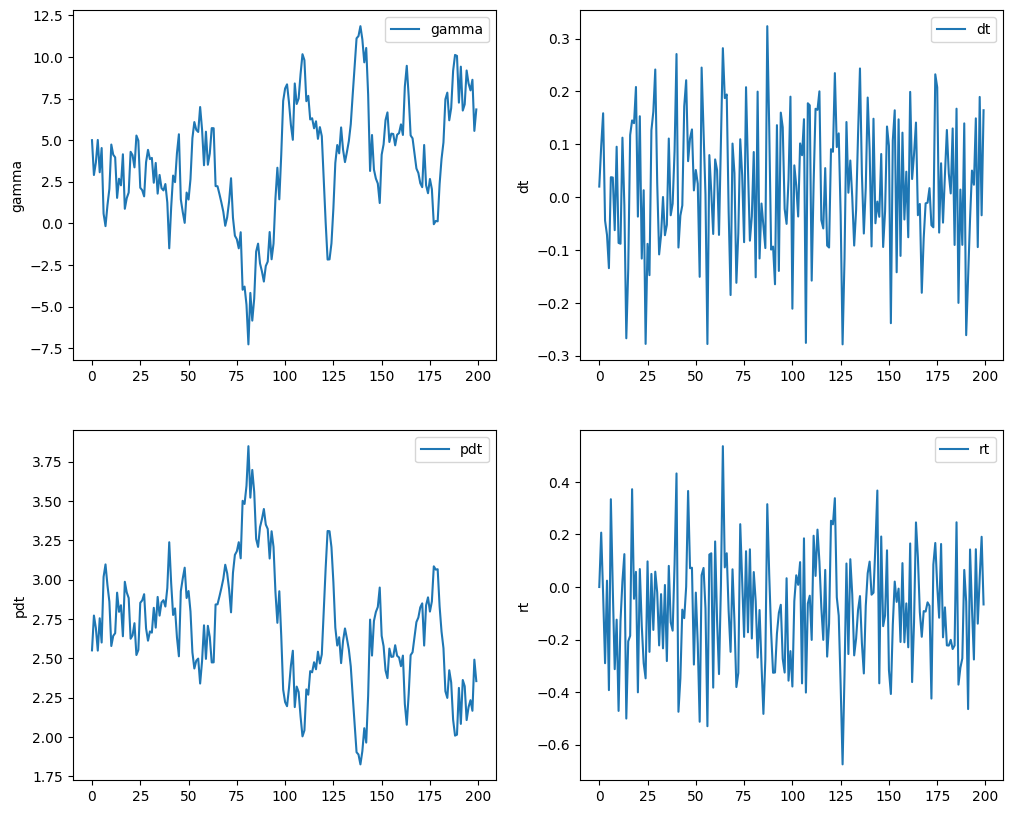

<Figure size 640x480 with 0 Axes>

In [4]:
plt.figure(figsize=(12, 10))
series = ['gamma','dt','pdt','rt']

for i in range(len(series)):
    name = series[i]
    plt.subplot(2, 2, i+1)
    plt.plot(data[name][:200],label=name)
    plt.ylabel(name)
    plt.legend(loc='upper right')
plt.show()
plt.tight_layout()

(b) Estimate the below VAR(1) using the simulated data.
$$z_t = \begin{bmatrix}r_t\\pd_t\\\Delta d_t\end{bmatrix}$$
$$z_t = \phi_0 + \phi_1z_{t-1} + \varepsilon_t$$
Report 
$\phi=0$ and 
$\phi=1$. Also report the $R^2$in each of the three regressions you run. Is the VAR stationary? Are returns predictable? Is dividend growth predictable?
Is the pd ratio predictable?

In [5]:
model = VAR(data[['rt','pdt','dt']][2:N+1])
result = model.fit()  
print(result.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 20, Feb, 2024
Time:                     00:00:47
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -46.8693
Nobs:                     9998.00    HQIC:                  -46.8750
Log likelihood:           191795.    FPE:                4.37693e-21
AIC:                     -46.8779    Det(Omega_mle):         0.00000
--------------------------------------------------------------------
Results for equation rt
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const          0.288763         0.014503           19.910           0.000
L1.rt         -0.007545         0.012231           -0.617           0.537
L1.pdt        -0.146987         0.005599          -26.253           0.000
L1.dt          0.

In [6]:
print("Model is stable:", result.is_stable())

Model is stable: True


#### Answer
The output indicates that the model is stable which implies that the VAR is stationary. 

The coefficient of L1.rt (lagged returns) is not statistically significant since its p-value is 0.537 (we typically look for a p-value less than 0.05 for significance). This suggests that past returns do not have a statistically significant effect on current returns, thus implying that returns are not easily predictable based on their own past values.

The coefficient of L1.dt (lagged dividend growth) in the dividend growth equation is not statistically significant either (p-value 0.486), suggesting that past dividend growth is not a significant predictor of current dividend growth.

In the case of the pd ratio, the coefficient of L1.pdt (lagged pd ratio) is statistically significant with a p-value of 0.000, which is much lower than the typical significance level of 0.05. This indicates that the pd ratio is predictable from its own past values.

(c) From the class notes we have that we can write:
$$z_t = const \sum_{j=0}^{\infty}\phi_{1}^{j}\varepsilon_{t-j}$$
Plot $\frac{\partial z_{t+j}^{(1)}}{\partial \varepsilon_{t+j}^{(2)}}$ for j = 1, ..., 20. That is, what is the effect of a shock to the second variable in the VAR (the pd-ratio) on the first variable in the VAR (the returns)? For each j, this is simply the (1,2) element of 
$\phi_{1}^{j}$

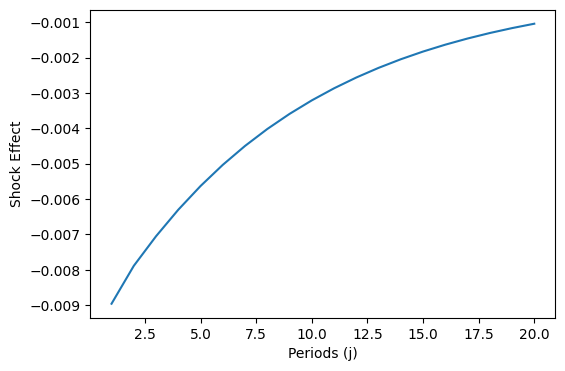

In [7]:
def get_shock(phi):
    shock = [phi[0,1]]
    phi_j = phi

    for i in range(2, 21):
        phi_j = np.dot(phi_j, phi)
        shock.append(phi_j[0,1])
    return shock

phi = np.array(result.params[1:])

plt.figure(figsize=(6,4))
plt.plot(range(1, 21),get_shock(phi))
plt.xlabel('Periods (j)')
plt.ylabel('Shock Effect')
plt.show()

(d) In your simulated data, compute $corr(\rho \cdot pd_{t+1} - pd_t, r_{t+1})$. What is the intuition for the sign of this contemporaneous correlation? Relate this to the responses
you plotted in c. for a shock to the pd ratio.

In [8]:
np.corrcoef(rho * data['pdt'].shift(-1)[2:N] - data['pdt'][2:N],data['rt'].shift(-1)[2:N])[0, 1]

0.8038127926931823

### Answer
The impulse response function plotted in part c shows the effect of a shock to the pd ratio on returns. The negative slope indicates that a positive shock to the pd ratio has a negative effect on returns over time.

In part d, the contemporaneous correlation calculated is positive (approximately 0.803). This suggests that when the pd ratio increases (holding past returns constant), current returns also tend to be higher. The positive correlation means that there is a contemporaneous relationship between the pd ratio and returns.

The intuition behind this positive contemporaneous correlation, when related to the impulse response function, could be that while an immediate shock to the pd ratio might elevate returns at the same moment (hence the positive contemporaneous correlation), over time, this effect fades and eventually turns negative as indicated by the impulse response function. 

(e) The VAR provides an analytical expression for the forecast of returns at any
horizon. Instead, on the simulated data run standard forecasting regressions at
different horizons with overlapping observations. In particular, run:
$$r_{t,t+k} = \alpha_k + \beta_k pd_t + \varepsilon_{t,t+k}$$ 
for k = 1, 2, ..., 5 Here, $r_{t,t+k} = r_{t+1} + r_{t+2} + ... + r_{t+5}$. Report the slope coefficient $\beta_k$ and the $R^2$ for each of these regressions. Give the intuition for the observed pattern.

In [9]:
lm_df = pd.DataFrame(columns=['coef','pvalue','R2'])
for i in range(1, 6):
    data[f'rt_{i}'] = data['rt'].rolling(window=i).sum().shift(-i)
    df = data[[f'rt_{i}','pdt']][1:].dropna()
    model = sm.OLS(df[f'rt_{i}'], sm.add_constant(df['pdt'])).fit()
    lm_df.loc[f'c_{i}'] = [model.params[0],model.pvalues[0],model.rsquared]
    lm_df.loc[f'rt_{i}'] = [model.params[1],model.pvalues[1],model.rsquared]

lm_df.round(4)

,coef,pvalue,R2
c_1,0.2913,0.0,0.0663
rt_1,-0.1475,0.0,0.0663
c_2,0.5385,0.0,0.1207
rt_2,-0.2776,0.0,0.1207
c_3,0.7407,0.0,0.1648
rt_3,-0.3898,0.0,0.1648
c_4,0.9140,0.0,0.2020
rt_4,-0.4906,0.0,0.2020
c_5,1.0586,0.0,0.2325
rt_5,-0.5800,0.0,0.2325


(f) The optimal predictive model for expected returns using only realized returns
(i.e., $E(r_{t+1}|r_t, r_{t-1}, ...))$ is an ARMA(1,1). How do we know this? Well, expected
returns follow an AR(1) process so realized returns follow an ARMA(1,1) process
as realized returns are an AR(1) + White noise (see earlier homework).
Estimate an ARMA(1,1) on the simulated return series. Give the coe¢ cients.
Do the magnitudes of 
1 and 1 make sense? Why/why not. Also compute the
implied $R^2$ of this model $(R^2 = \frac{Var(E_t(r_{t+1}))}{Var(r_{t+1})})$ and compare it to the R2 in e. when k = 1. Why is the latter R2 higher even though the ARMA(1,1) is the optimal way to estimate $E(r_{t+1}|r_t, r_{t-1}, ...)$

In [10]:
arma = sm.tsa.ARIMA(data['rt'][2:], order=(1, 0, 1)).fit()
arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     rt   No. Observations:                 9999
Model:                 ARIMA(1, 0, 1)   Log Likelihood                1895.798
Date:                Tue, 20 Feb 2024   AIC                          -3783.596
Time:                        00:00:49   BIC                          -3754.755
Sample:                             0   HQIC                         -3773.834
                               - 9999                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0810      0.001    -60.408      0.000      -0.084      -0.078
ar.L1          0.8818      0.022     39.370      0.000       0.838       0.926
ma.L1         -0.9208      0.019    -49.356      0.000      -0.957      -0.884
sigma2         0.0401      0.001     70.040      0.000       0.039       0.041
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                 0.80
Prob(Q):                              0.60   Prob(JB):                         0.67
Heteroskedasticity (H):               1.02   Skew:                            -0.01
Prob(H) (two-sided):                  0.51   Kurtosis:                         2.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
phi = arma.params[1]
theta = -arma.params[2]
sigma = arma.params[3]

var1 = sigma * (1 + theta**2 - 2 * phi * theta) / (1 - phi**2)
var2 = phi**2 * var1 + theta**2 * sigma - 2 * phi * theta * sigma

Rsq = var2 / var1
print("Rsq:", Rsq)

Rsq: 0.006813651105024134


### Answer
The coefficient of the AR(1) component is 0.8818, which is quite significant (p-value = 0.000) and less than 1. This makes sense since it indicates a strong positive autocorrelation in returns, but since it is less than 1, it suggests that the series is stationary and mean-reverting.

The coefficient of the MA(1) component is -0.9208, which is also significant (p-value = 0.000). The negative value suggests that the moving average part of the model is adjusting for a shock in the previous period, which makes sense as it corrects the forecast error from the last period.

The higher R² values in the linear regressions compared to the implied R² of the ARMA model can be due to the fact that the linear regressions are simple and do not account for the complexity of the ARMA process. Linear regression models may capture more variance by overfitting the data, especially with overlapping observations, which can inflate R² values. On the other hand, the ARMA model, being the optimal model for such time series data, provides a more accurate and generalizable understanding of the data despite a lower R², as it properly captures the time-dependent structure of the data. The implied R² of the ARMA model is a more conservative and likely more accurate reflection of the model's explanatory power.

(g) Assume you are a CFO and your company has a one-period project with expected
cash flow equal to 10. Assume that the beta of your company is 1.0. Further
assume the risk-free rate is 2% and that the conditional market risk premium
is either 2% (good times) or 12% (bad times). What is the present value of
this project under the two risk premium scenarios? If the project requires an
immediate investment of $9, under what market scenario should you undertake
the investment ñgood times, bad times, neither, or both?

In [12]:
cf = 10
beta = 1
rf = 0.02
rp_g = 0.02
rp_b = 0.12

ret_df = pd.DataFrame(index=['good','bad'],columns=['return','PV'])
ret_df.loc['good','return'] = rf + beta * rp_g
ret_df.loc['good','PV']= cf/(1+rf + beta * rp_g) - 9

ret_df.loc['bad','return'] = rf + beta * rp_b
ret_df.loc['bad','PV']= cf/(1+rf + beta * rp_b) - 9

ret_df

,return,PV
good,0.04,0.615385
bad,0.14,-0.22807


### Answer
The project should only be undertaken in good times when the market risk premium is 2%. In bad times, the negative present value indicates that the investment would not generate enough return to cover the initial outlay, making it an unwise financial decision.

(h) You are an investor that, unlike the representative agent we have modeled earlier,
have constant risk aversion equal to $\gamma=3$ and demand for the market as
$$\omega_t = \frac{E_t(r_{t+1} - r_f)}{\gamma Var_t(r_{t+1} - r_f)}$$
Note that the variance of market returns in this economy is constant and equal to
(20%)^2. What is your portfolio share in the market portfolio in good times, and
what is your portfolio share in the market in bad times?

In [13]:
gamma = 3
var = 0.20**2
w_good = rp_g / (gamma * var)
w_bad = rp_b / (gamma * var)

print("W_good:", np.round(w_good,4))
print("W_bad:", np.round(w_bad,4))

W_good: 0.1667
W_bad: 1.0
